In [1]:
import pandas as pd

In [2]:
from sklearn import cluster, datasets, metrics
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir+"/datascience_eda") 

In [4]:
import datascience_eda as eda

In [5]:
original_df = pd.read_csv(currentdir + "/data/menu.csv")
numeric_features = eda.get_numeric_columns(original_df)
drop_features = []
numeric_transformer = make_pipeline(SimpleImputer(), StandardScaler())
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features), ("drop", drop_features)
)
df = pd.DataFrame(
    data=preprocessor.fit_transform(original_df), columns=numeric_features
)

In [6]:
df.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,-0.284684,-0.055600,-0.082193,-0.083110,-0.189714,-0.186753,-0.475935,2.354245,2.362878,0.441471,...,-0.579695,-0.614883,1.514176,1.663125,-0.923090,0.321071,-0.140913,-0.324574,0.237056,0.834481
1,-0.493184,-0.447358,-0.434836,-0.449359,-0.566247,-0.562864,-0.475935,-0.343764,-0.357915,0.476198,...,-0.615159,-0.614883,1.514176,1.663125,-0.923090,0.408758,-0.305390,-0.324574,0.237056,0.030481
2,0.007217,0.571214,0.623093,0.603606,0.375084,0.452635,-0.475935,-0.114147,-0.116832,0.493562,...,-0.650622,-0.614883,1.514176,1.663125,-0.958025,0.058009,-0.223151,-0.324574,0.237056,0.260195
3,0.340818,0.962972,0.975736,0.969855,0.751616,0.828745,-0.475935,2.641267,2.638401,0.632471,...,-0.615159,-0.614883,1.514176,1.663125,-0.958025,0.671820,0.064684,-0.324574,0.531396,0.834481
4,0.132318,0.649565,0.623093,0.603606,0.375084,0.452635,-0.475935,-0.056742,-0.082392,0.667198,...,-0.615159,-0.614883,1.514176,1.663125,-0.958025,0.671820,-0.305390,-0.324574,0.237056,0.260195


***********************
EXPLORE CLUSTERING
***********************
------------------------
K-MEANS CLUSTERING
------------------------
Generating KElbow plot for KMeans.


/opt/miniconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/miniconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


<Figure size 576x396 with 0 Axes>

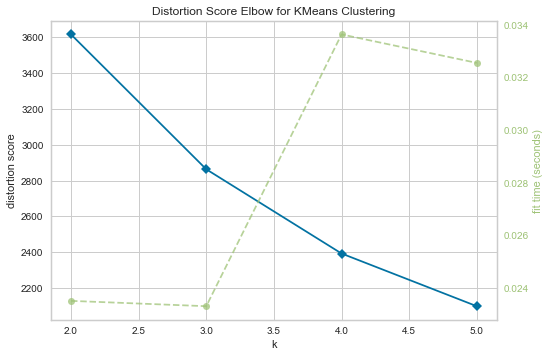

Generating Silhouette & PCA plots
Number of clusters: 2


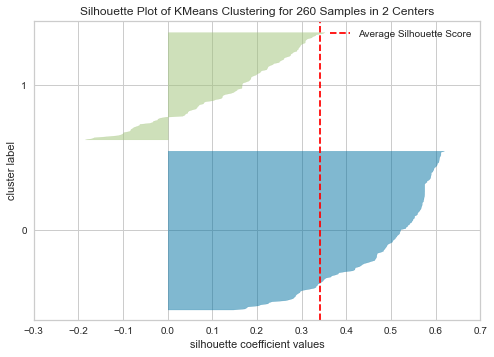

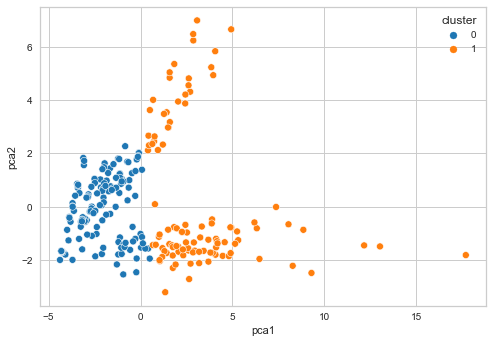

Number of clusters: 3


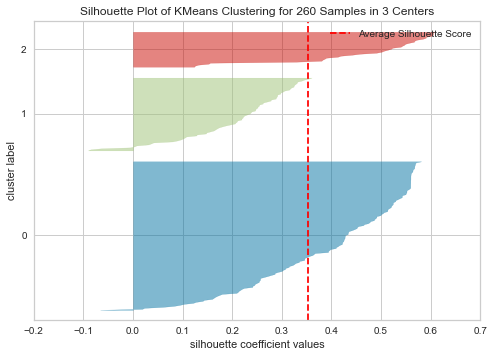

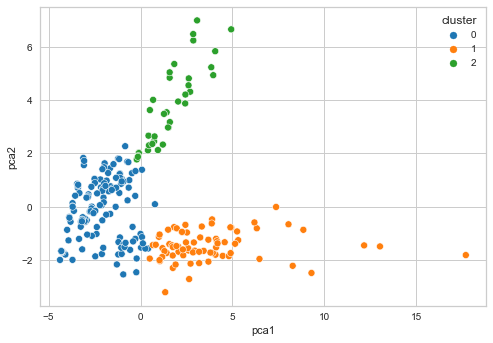

Number of clusters: 4


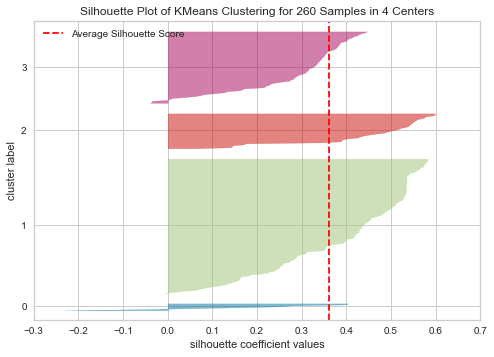

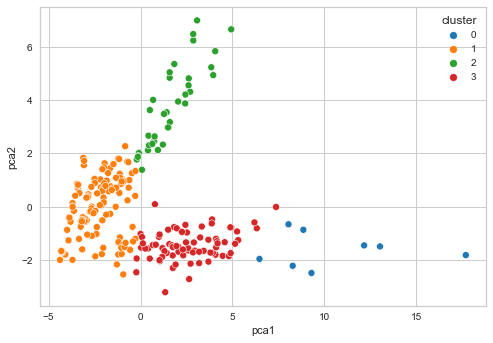

Number of clusters: 5


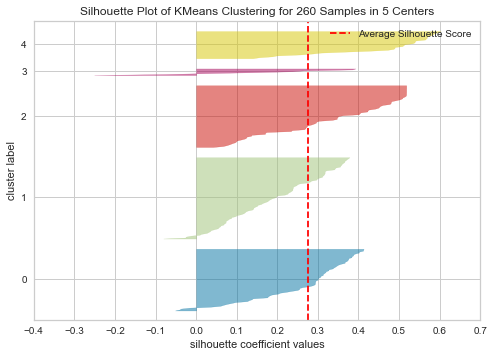

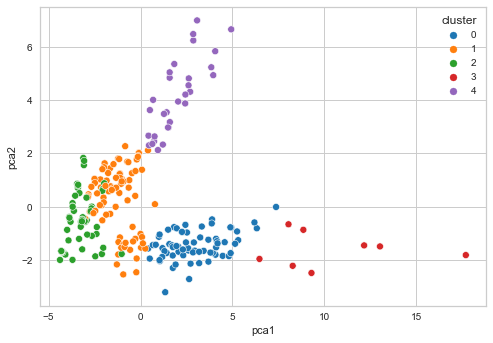

------------------------
DBSCAN CLUSTERING
------------------------
eps=0.5, min_samples=5, n_cluster=2


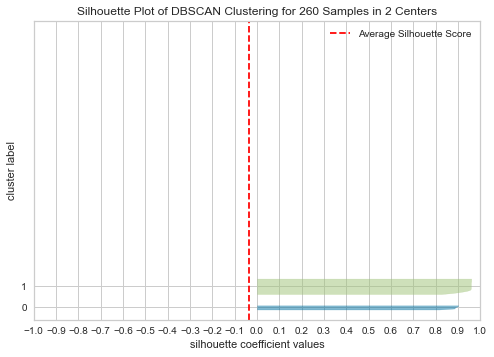

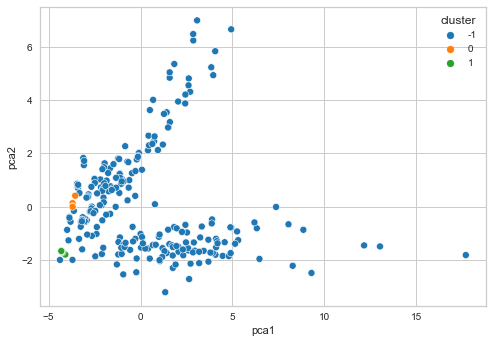

***********************
FINISHED CLUSTERING
***********************


In [7]:
results = eda.explore_clustering(df, random_state=2021);

### Testing 'explore_text_columns' function:

In [8]:
text_df = pd.read_csv("data/spam.csv", encoding="latin-1")
text_df = text_df.rename(columns={"v1": "target", "v2": "sms"})

Identified the following as text columns: ['sms']




## Exploratory Data Analysis of "sms" column:<br>

### Character Length:<br>

- The average character length of text is 80.12

- The median character length of text is 61

- The longest text(s) has 910 characters:


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

- The shortest text(s) has 2 characters:


"Ok"<br><br>

#### Histogram of number of characters in "sms":

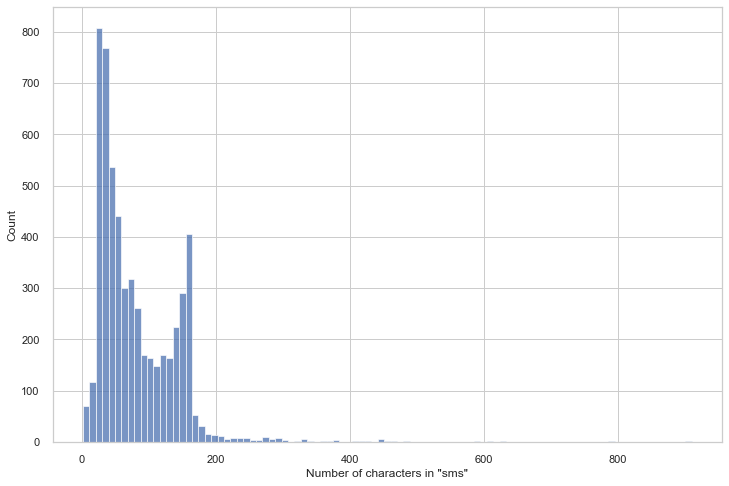

### Word Count:<br>

- The average number of words in "sms": 15.49

- The median number of words in "sms": 12

- The text(s) in "sms" with most words (171 words):


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#### Histogram of number of words in "sms":

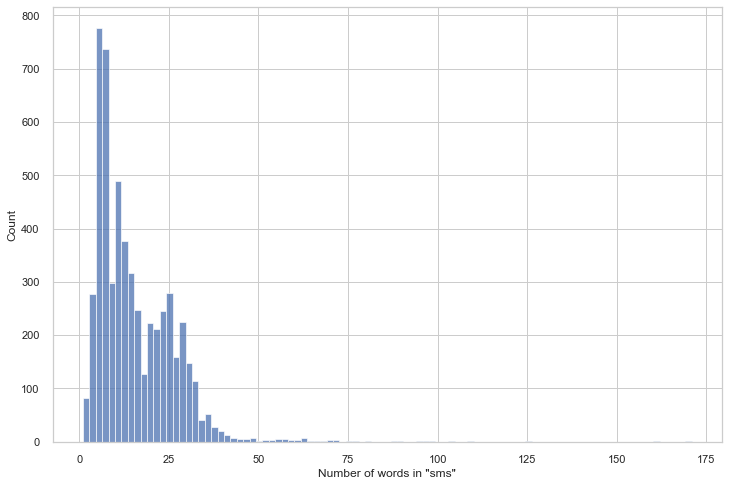

<br>

### Word Cloud:<br>

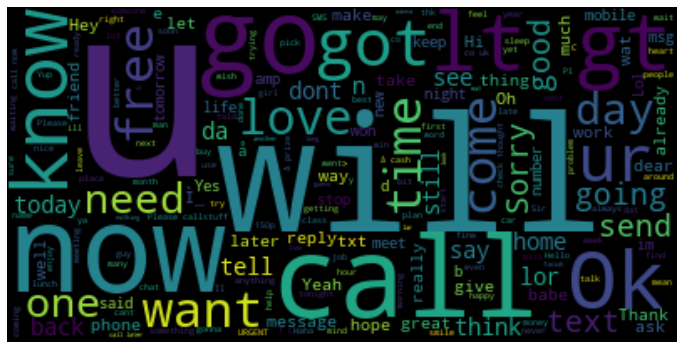

<br>

### Bar Chart of the top stopwords:<br>

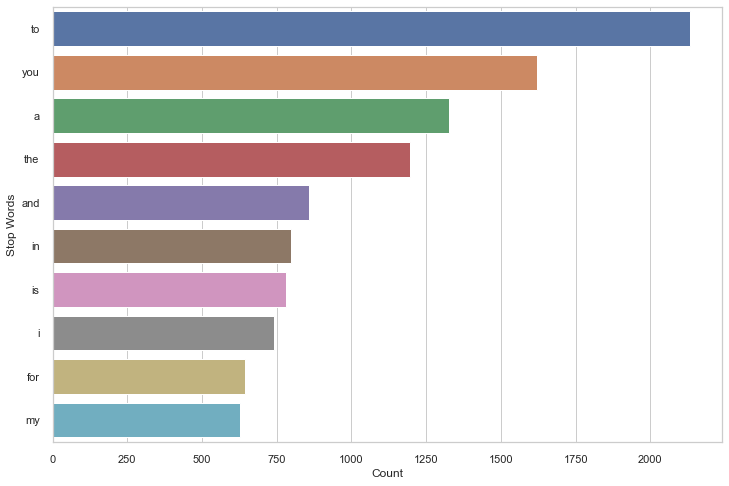

### Bar Chart of the top non-stopwords:<br>

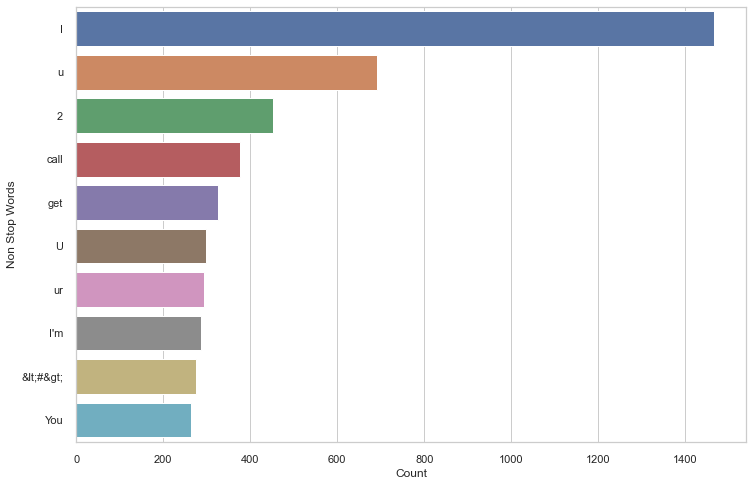

### Bar Chart of the top Bi-grams:<br>

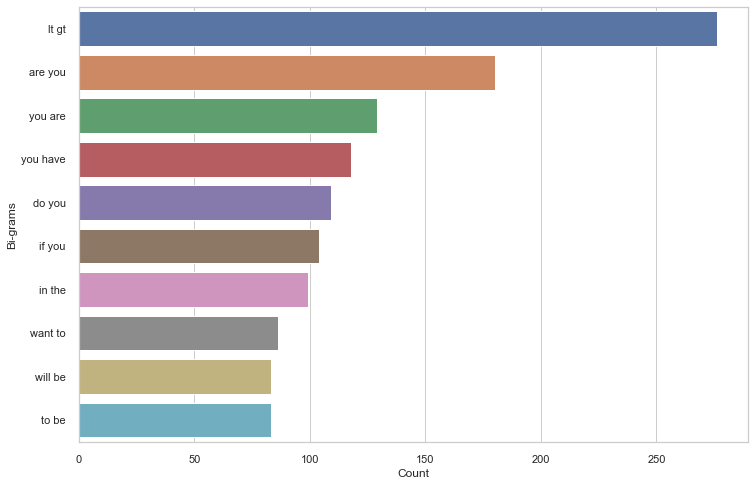

### Distribution of Polarity scores:<br>

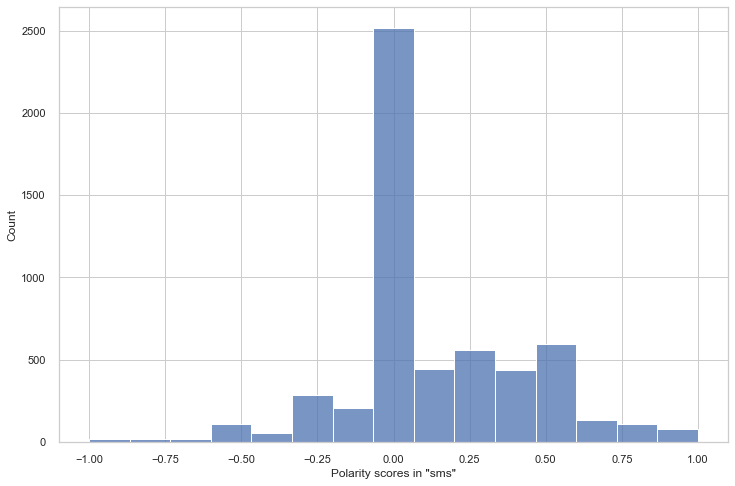

### Bar chart of Sentiments:<br>

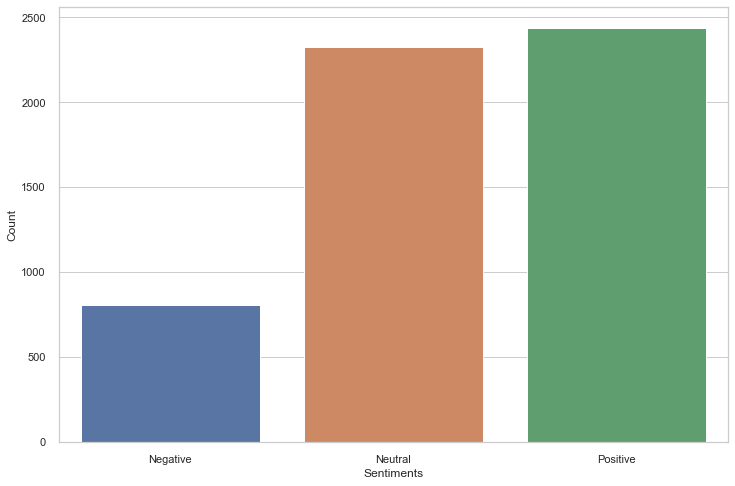

### Distribution of Subjectivity scores:<br>

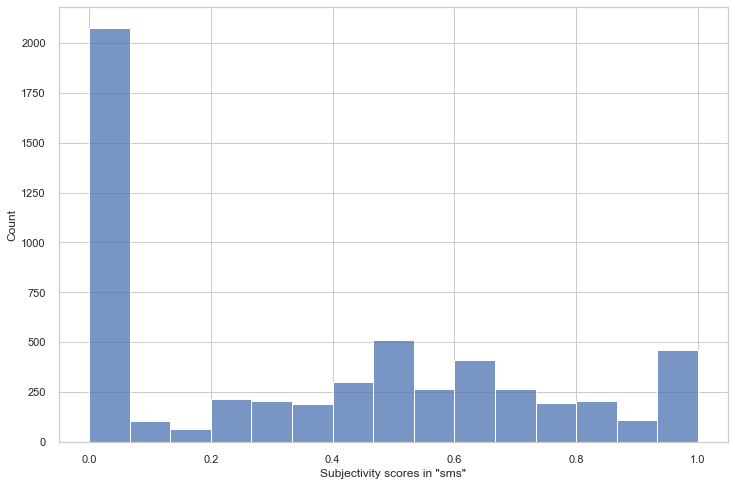

### Bar Chart of Named Entities:<br>

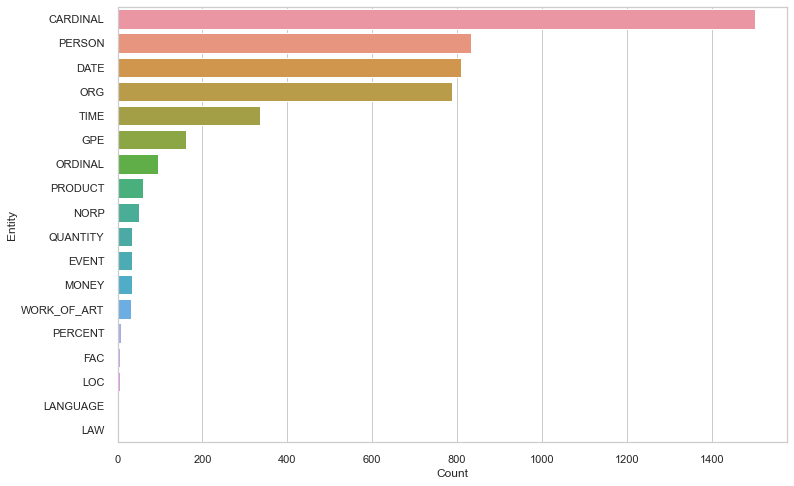

### Bar Chart of the token- "PERSON":<br>

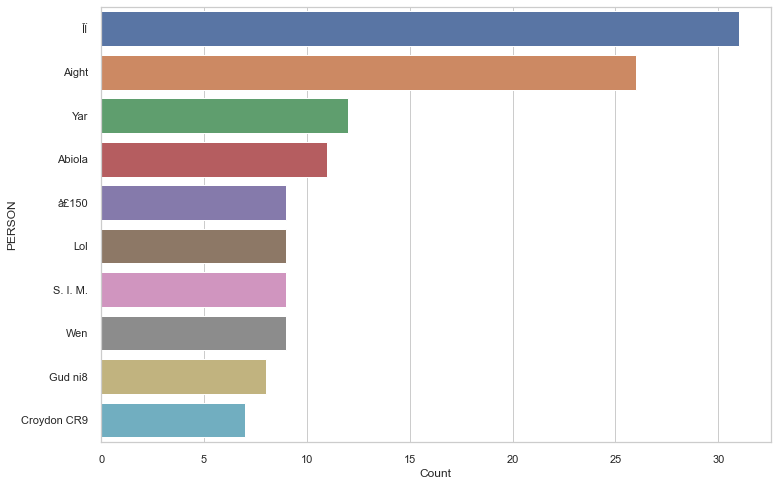

### Bar Chart of the token- "GPE":<br>

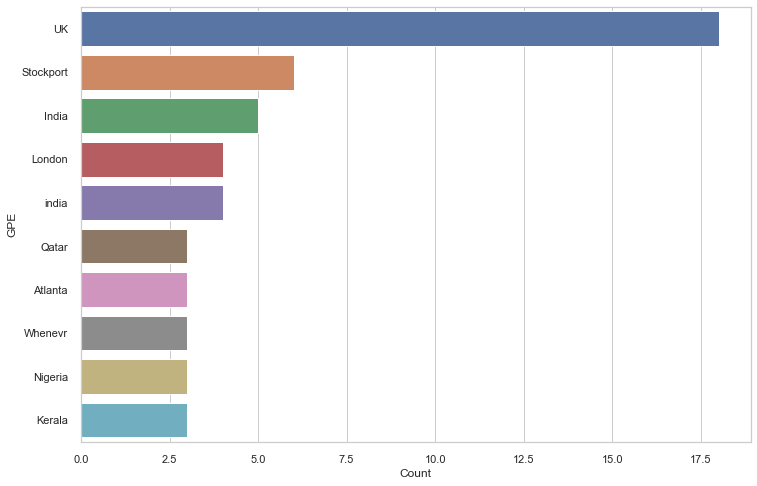

### Bar Chart of the token- "ORG":<br>

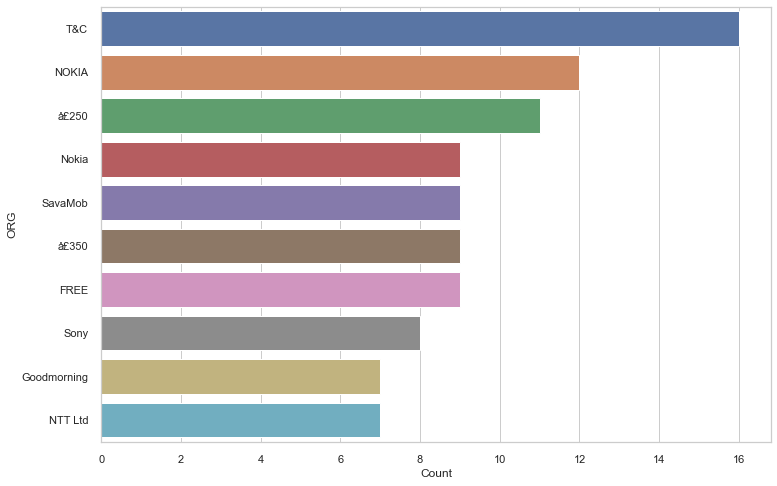

### Bar Chart of Part of Speech Tags:<br>

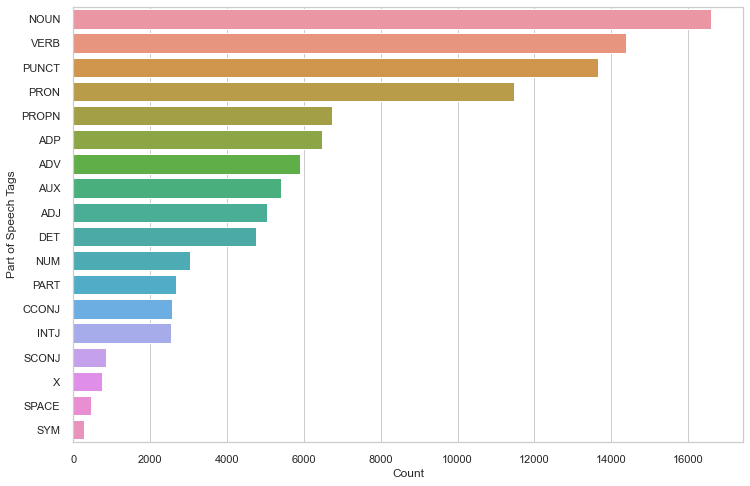

In [9]:
text_results = eda.explore_text_columns(text_df);